In [1]:
import os
import json
import matplotlib.pyplot as plt

import xarray as xr
import seaborn as sns
import pandas as pd
import numpy as np
from pypalettes import load_cmap

import functions.eddy_feedback as ef

In [2]:
df = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots/data/pamip_k_efp_winters.csv')
df

,model,efp_nh,efp_nh_gt3,efp_nh_123,efp_sh,efp_sh_gt3,efp_sh_123
0,AWI-CM-1-1-MR,0.2592,0.1931,0.0607,0.2557,0.2325,0.0223
1,CNRM-CM6-1,0.2244,0.1286,0.0827,0.1944,0.1805,0.0132
2,CanESM5,0.3133,0.1771,0.1232,0.3271,0.2758,0.0195
3,FGOALS-f3-L,0.2353,0.1231,0.0731,0.1273,0.1061,0.0114
4,HadGEM3-GC31-LL,0.1735,0.1072,0.0529,0.1729,0.1528,0.0160
5,HadGEM3-GC31-MM,0.2525,0.1087,0.1022,0.1874,0.1544,0.0140
6,IPSL-CM6A-LR,0.2623,0.1947,0.0654,0.2015,0.1938,0.0179
7,MIROC6,0.1592,0.1045,0.0425,0.2058,0.1458,0.0273


In [3]:
# Load custom colormap
cmap = load_cmap("highcontrast")
palette = cmap.colors


/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


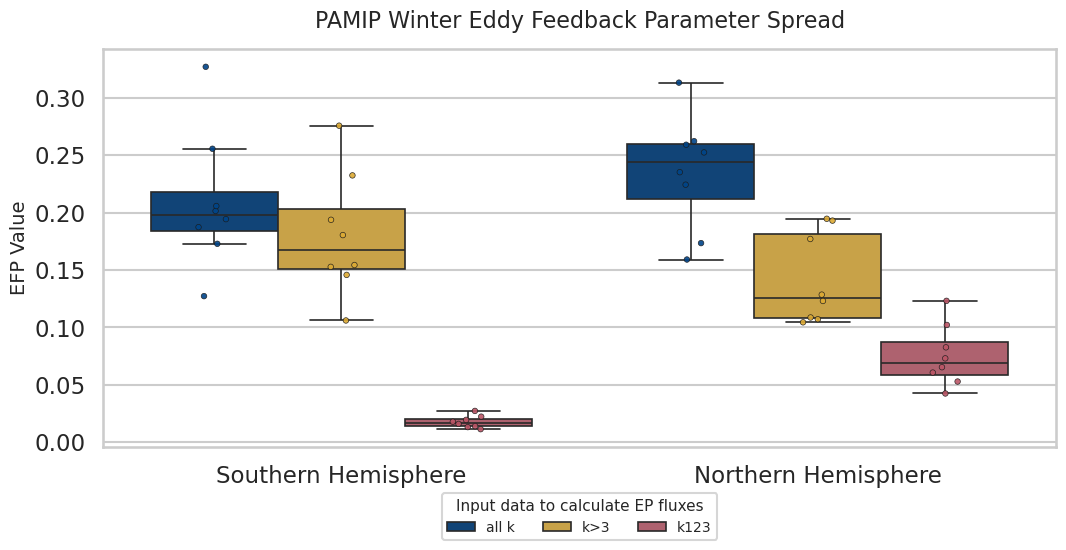

In [4]:

# Convert to discrete palette for seaborn
# palette = sns.color_palette(cmap, n_colors=3)

# Melt to long format for seaborn
df_long = df.melt(
    id_vars="model",
    value_vars=["efp_sh", "efp_sh_gt3", "efp_sh_123", "efp_nh", "efp_nh_gt3", "efp_nh_123"],
    var_name="hemisphere_dataset", value_name="efp"
)

# Split hemisphere and dataset info
df_long[['hemisphere', 'dataset']] = df_long['hemisphere_dataset'].str.extract(r'efp_(nh|sh)(_.*)?')
df_long['dataset'] = df_long['dataset'].replace({None: 'all k', '_gt3': 'k>3', '_123': 'k123'})

# Set general style and context (no palette override)
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(11, 6))

# Boxplot
sns.boxplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    linewidth=1.2, showfliers=False,
    palette=palette
)

# Overlay stripplot
sns.stripplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    dodge=True, alpha=0.9, size=4, jitter=True,
    marker="o", linewidth=0.5, edgecolor='k',
    palette=palette
)

# Labels and title
plt.xlabel("")
plt.ylabel("EFP Value", fontsize=14)
plt.title("PAMIP Winter Eddy Feedback Parameter Spread", fontsize=16, pad=15)
plt.xticks([0, 1], ["Southern Hemisphere", "Northern Hemisphere"])

# Remove duplicate legend handles
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3],
           title="Input data to calculate EP fluxes", loc="lower center",
           bbox_to_anchor=(0.5, -0.25),
           ncol=3, fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


# Include reanalysis values

#### First, need to calculate the values and then add the table

In [5]:
jra_path = '/home/links/ct715/data_storage/reanalysis/jra55_daily/k123_daily_QG_epfluxes'
jra = xr.open_mfdataset(os.path.join(jra_path, '*.nc'), combine='by_coords')
jra

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


<xarray.Dataset> Size: 140GB
Dimensions:      (time: 21550, level: 37, lat: 73, lon: 144)
Coordinates:
  * time         (time) datetime64[ns] 172kB 1958-01-01T09:00:00 ... 2016-12-...
  * lon          (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float64 584B -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
  * level        (level) float64 296B 1e+03 975.0 950.0 925.0 ... 3.0 2.0 1.0
    year         (time) int32 86kB dask.array<chunksize=(365,), meta=np.ndarray>
Data variables: (12/17)
    u            (time, level, lat, lon) float32 34GB dask.array<chunksize=(365, 37, 73, 144), meta=np.ndarray>
    v            (time, level, lat, lon) float32 34GB dask.array<chunksize=(365, 37, 73, 144), meta=np.ndarray>
    t            (time, level, lat, lon) float32 34GB dask.array<chunksize=(365, 37, 73, 144), meta=np.ndarray>
    omega        (time, level, lat, lon) float32 34GB dask.array<chunksize=(365, 37, 73, 144), meta=np.ndarray>
    ubar         (time, level, lat) float32 233MB dask.array<chunksize=(365, 37, 73), meta=np.ndarray>
    ep1_QG       (time, level, lat) float64 466MB dask.array<chunksize=(365, 37, 73), meta=np.ndarray>
    ...           ...
    div1_QG_123  (time, level, lat) float64 466MB dask.array<chunksize=(365, 37, 73), meta=np.ndarray>
    div2_QG_123  (time, level, lat) float64 466MB dask.array<chunksize=(365, 37, 73), meta=np.ndarray>
    ep1_QG_gt3   (time, level, lat) float64 466MB dask.array<chunksize=(365, 37, 73), meta=np.ndarray>
    ep2_QG_gt3   (time, level, lat) float64 466MB dask.array<chunksize=(365, 37, 73), meta=np.ndarray>
    div1_QG_gt3  (time, level, lat) float64 466MB dask.array<chunksize=(365, 37, 73), meta=np.ndarray>
    div2_QG_gt3  (time, level, lat) float64 466MB dask.array<chunksize=(365, 37, 73), meta=np.ndarray>

Note that this is using daily input values. If required, I will need to calculate 6-hourly data.

In [6]:
jra_nh = ef.calculate_efp(jra, data_type='reanalysis', which_div1='div1_QG')
jra_sh = ef.calculate_efp(jra, data_type='reanalysis', which_div1='div1_QG', calc_south_hemis=True)
print(f"JRA55 NH EFP: {jra_nh:.3f}")
print(f"JRA55 SH EFP: {jra_sh:.3f}")

JRA55 NH EFP: 0.363
JRA55 SH EFP: 0.203


In [7]:
jra_nh_123 = ef.calculate_efp(jra, data_type='reanalysis', which_div1='div1_QG_123')
jra_sh_123 = ef.calculate_efp(jra, data_type='reanalysis', which_div1='div1_QG_123', calc_south_hemis=True)
print(f"JRA55_123 NH EFP: {jra_nh_123:.3f}")
print(f"JRA55_123 SH EFP: {jra_sh_123:.3f}")

JRA55_123 NH EFP: 0.176
JRA55_123 SH EFP: 0.032


In [8]:
jra_nh_gt3 = ef.calculate_efp(jra, data_type='reanalysis', which_div1='div1_QG_gt3')
jra_sh_gt3 = ef.calculate_efp(jra, data_type='reanalysis', which_div1='div1_QG_gt3', calc_south_hemis=True)
print(f"JRA55_gt3 NH EFP: {jra_nh_gt3:.3f}")
print(f"JRA55_gt3 SH EFP: {jra_sh_gt3:.3f}")

JRA55_gt3 NH EFP: 0.142
JRA55_gt3 SH EFP: 0.181


In [9]:
df.loc[len(df)] = ['JRA55', jra_nh, jra_nh_gt3, jra_nh_123, jra_sh, jra_sh_gt3, jra_sh_123]
df

,model,efp_nh,efp_nh_gt3,efp_nh_123,efp_sh,efp_sh_gt3,efp_sh_123
0,AWI-CM-1-1-MR,0.2592,0.1931,0.0607,0.2557,0.2325,0.0223
1,CNRM-CM6-1,0.2244,0.1286,0.0827,0.1944,0.1805,0.0132
2,CanESM5,0.3133,0.1771,0.1232,0.3271,0.2758,0.0195
3,FGOALS-f3-L,0.2353,0.1231,0.0731,0.1273,0.1061,0.0114
4,HadGEM3-GC31-LL,0.1735,0.1072,0.0529,0.1729,0.1528,0.0160
5,HadGEM3-GC31-MM,0.2525,0.1087,0.1022,0.1874,0.1544,0.0140
6,IPSL-CM6A-LR,0.2623,0.1947,0.0654,0.2015,0.1938,0.0179
7,MIROC6,0.1592,0.1045,0.0425,0.2058,0.1458,0.0273
8,JRA55,0.3631,0.1422,0.1763,0.2031,0.1811,0.0320


In [10]:
jra = df[df['model'] == 'JRA55'].reset_index(drop=True)
jra

,model,efp_nh,efp_nh_gt3,efp_nh_123,efp_sh,efp_sh_gt3,efp_sh_123
0,JRA55,0.3631,0.1422,0.1763,0.2031,0.1811,0.032


/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


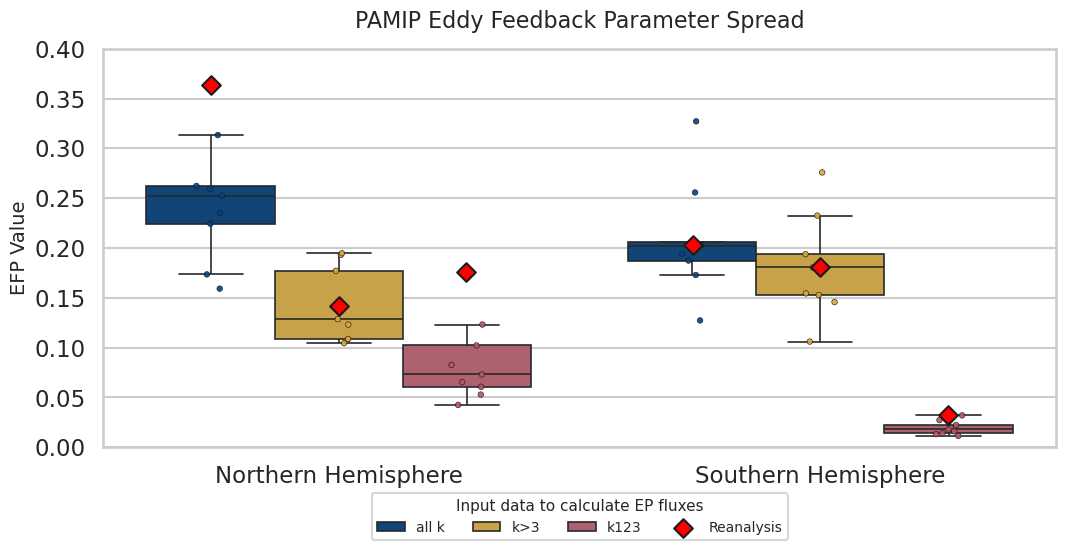

In [11]:

# Convert to discrete palette for seaborn
# palette = sns.color_palette(cmap, n_colors=3)

# Melt to long format for seaborn
df_long = df.melt(
    id_vars="model",
    value_vars=["efp_nh", "efp_nh_gt3", "efp_nh_123", "efp_sh", "efp_sh_gt3", "efp_sh_123"],
    var_name="hemisphere_dataset", value_name="efp"
)

# Split hemisphere and dataset info
df_long[['hemisphere', 'dataset']] = df_long['hemisphere_dataset'].str.extract(r'efp_(nh|sh)(_.*)?')
df_long['dataset'] = df_long['dataset'].replace({None: 'all k', '_gt3': 'k>3', '_123': 'k123'})

# Set general style and context (no palette override)
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(11, 6))

# Boxplot
sns.boxplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    linewidth=1.2, showfliers=False,
    palette=palette
)

# Overlay stripplot
sns.stripplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    dodge=True, alpha=0.9, size=4, jitter=True,
    marker="o", linewidth=0.5, edgecolor='k',
    palette=palette
)

# --- Add custom points ---
points = {
    ("NH", "total"): jra_nh,
    ("NH", "k>3"): jra_nh_gt3,
    ("NH", "k123"): jra_nh_123,
    ("SH", "total"): jra_sh,
    ("SH", "k>3"): jra_sh_gt3,
    ("SH", "k123"): jra_sh_123,
}

ax = plt.gca()

positions = {
    ("NH", "total"): -0.265,
    ("NH", "k>3"):  0.0,
    ("NH", "k123"):  0.265,
    ("SH", "total"):  0.735,
    ("SH", "k>3"):  1.0,
    ("SH", "k123"):  1.265,
}

for (hemi, dataset), value in points.items():
    x = positions[(hemi, dataset)]
    ax.scatter(x, value, color='red', s=90, edgecolor='k', zorder=10, marker='D')

# Labels and title
plt.ylim(0, 0.4)
plt.xlabel("")
plt.ylabel("EFP Value", fontsize=14)
plt.title("PAMIP Eddy Feedback Parameter Spread", fontsize=16, pad=15)
plt.xticks([0, 1], ["Northern Hemisphere", "Southern Hemisphere"])

# --- Custom legend ---
handles, labels = ax.get_legend_handles_labels()

# Remove duplicates (first 3 are from hue)
unique_handles = handles[0:3]
unique_labels = labels[0:3]

# Add proxy handle for the red diamonds
diamond_handle = plt.scatter([], [], color='red', edgecolor='k', marker='D', s=90, label='Reanalysis')
unique_handles.append(diamond_handle)
unique_labels.append('Reanalysis')

# Final legend
plt.legend(unique_handles, unique_labels,
           title="Input data to calculate EP fluxes",
           loc="lower center",
           bbox_to_anchor=(0.5, -0.25),
           ncol=4, fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


---

# Reanalysis error bars

In [12]:
import pandas as pd
import numpy as np
import os

bootstrap_data = '/home/links/ct715/eddy_feedback/chapter1/daily_efp/bootstrap/data/reanalysis/1979_2016'
files = os.listdir(bootstrap_data)

# Create empty lists to store data
efp_types = []
efp_means = []
efp_stds = []

for file in files:
    
    data = np.load(os.path.join(bootstrap_data, file))
    
    # skip daily files
    time_freq = file.split('_')[1]
    if time_freq == '6h':
        continue
    
    hemisphere = file.split('_')[-2]
    if hemisphere == 'djf-jra55':
        hemis = 'nh'
    else:
        hemis = 'sh'
    
    # split up into desired spatial scales
    which_k = file.split('_')[4]
    if which_k == '123':
        column = f'EFP_{hemis}_k123'
        data_mean = np.mean(data, axis=0)
        data_std = np.std(data, axis=0)
    elif which_k == 'gt3':
        column = f'EFP_{hemis}_k>3'
        data_mean = np.mean(data, axis=0)
        data_std = np.std(data, axis=0)
    else:
        column = f'EFP_{hemis}_total'
        data_mean = np.mean(data, axis=0)
        data_std = np.std(data, axis=0)
    
    # Append data to lists
    efp_types.append(column)
    efp_means.append(data_mean)
    efp_stds.append(data_std)
    
    print(file)
    print(column,':', data_mean, f'[{data_mean - data_std:.3f}, {data_mean + data_std:.3f}]')

# Create pandas DataFrame
bootstrap_df = pd.DataFrame({
    'efp_type': efp_types,
    'efp_mean': efp_means,
    'efp_std': efp_stds
})

bootstrap_df

reanalysis_daily_div1_QG_gt3_djf-jra55_efp.npy
EFP_nh_k>3 : 0.1606683 [0.124, 0.198]
reanalysis_daily_div1_QG_123_jas-jra55_efp.npy
EFP_sh_k123 : 0.055923900000000006 [0.041, 0.071]
reanalysis_daily_div1_QG_jas-jra55_efp.npy
EFP_sh_total : 0.2198312 [0.187, 0.252]
reanalysis_daily_div1_QG_gt3_jas-jra55_efp.npy
EFP_sh_k>3 : 0.2011371 [0.167, 0.235]
reanalysis_daily_div1_QG_djf-jra55_efp.npy
EFP_nh_total : 0.35690639999999996 [0.306, 0.408]
reanalysis_daily_div1_QG_123_djf-jra55_efp.npy
EFP_nh_k123 : 0.1800912 [0.142, 0.218]


,efp_type,efp_mean,efp_std
0,EFP_nh_k>3,0.160668,0.037030
1,EFP_sh_k123,0.055924,0.014937
2,EFP_sh_total,0.219831,0.032533
3,EFP_sh_k>3,0.201137,0.033651
4,EFP_nh_total,0.356906,0.050626
5,EFP_nh_k123,0.180091,0.037696


/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/emmy-noether/home/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


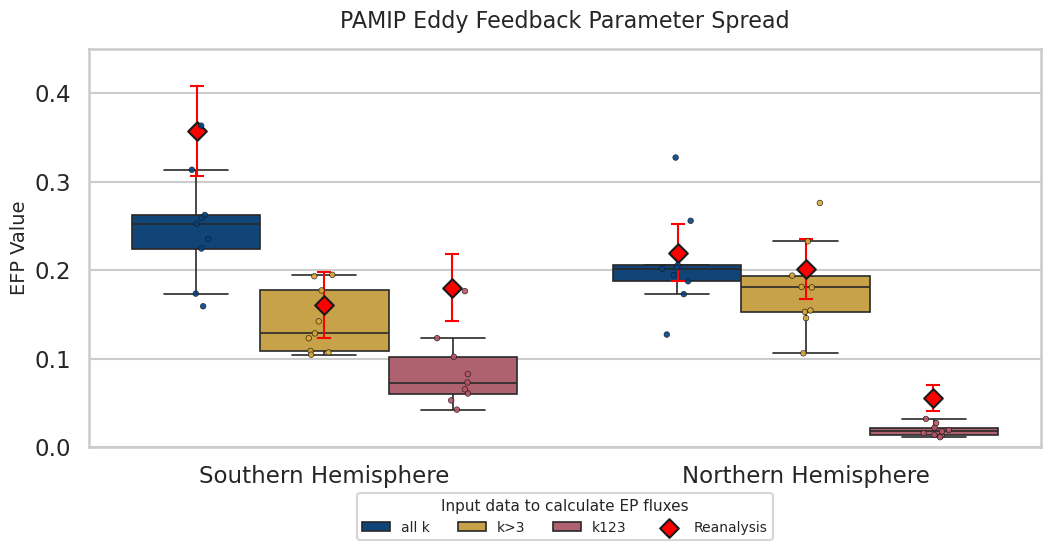

In [13]:
# Convert to discrete palette for seaborn
# palette = sns.color_palette(cmap, n_colors=3)

# Melt to long format for seaborn
df_long = df.melt(
    id_vars="model",
    value_vars=["efp_nh", "efp_nh_gt3", "efp_nh_123", "efp_sh", "efp_sh_gt3", "efp_sh_123"],
    var_name="hemisphere_dataset", value_name="efp"
)

# Split hemisphere and dataset info
df_long[['hemisphere', 'dataset']] = df_long['hemisphere_dataset'].str.extract(r'efp_(nh|sh)(_.*)?')
df_long['dataset'] = df_long['dataset'].replace({None: 'all k', '_gt3': 'k>3', '_123': 'k123'})

# Set general style and context (no palette override)
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(11, 6))

# Boxplot
sns.boxplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    linewidth=1.2, showfliers=False,
    palette=palette
)

# Overlay stripplot
sns.stripplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    dodge=True, alpha=0.9, size=4, jitter=True,
    marker="o", linewidth=0.5, edgecolor='k',
    palette=palette, zorder=11
)

# --- Add custom points with error bars ---
# Assuming you have a DataFrame called 'bootstrap_df' with columns: efp_type, efp_mean, efp_std
points = {
    ("NH", "total"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_nh_total']['efp_mean'].values[0],
    ("NH", "k>3"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_nh_k>3']['efp_mean'].values[0],
    ("NH", "k123"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_nh_k123']['efp_mean'].values[0],
    ("SH", "total"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_sh_total']['efp_mean'].values[0],
    ("SH", "k>3"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_sh_k>3']['efp_mean'].values[0],
    ("SH", "k123"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_sh_k123']['efp_mean'].values[0],
}

# Get standard deviations for error bars
errors = {
    ("NH", "total"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_nh_total']['efp_std'].values[0],
    ("NH", "k>3"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_nh_k>3']['efp_std'].values[0],
    ("NH", "k123"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_nh_k123']['efp_std'].values[0],
    ("SH", "total"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_sh_total']['efp_std'].values[0],
    ("SH", "k>3"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_sh_k>3']['efp_std'].values[0],
    ("SH", "k123"): bootstrap_df[bootstrap_df['efp_type'] == 'EFP_sh_k123']['efp_std'].values[0],
}

ax = plt.gca()

positions = {
    ("NH", "total"): -0.265,
    ("NH", "k>3"):  0.0,
    ("NH", "k123"):  0.265,
    ("SH", "total"):  0.735,
    ("SH", "k>3"):  1.0,
    ("SH", "k123"):  1.265,
}

for (hemi, dataset), value in points.items():
    x = positions[(hemi, dataset)]
    error = errors[(hemi, dataset)]
    
    # Add error bars
    ax.errorbar(x, value, yerr=error, color='red', capsize=5, capthick=1.5, 
                elinewidth=1.5, zorder=9)
    
    # Add point
    ax.scatter(x, value, color='red', s=90, edgecolor='k', zorder=10, marker='D')

# Labels and title
plt.ylim(0, 0.45)
plt.xlabel("")
plt.ylabel("EFP Value", fontsize=14)
plt.title("PAMIP Eddy Feedback Parameter Spread", fontsize=16, pad=15)
plt.xticks([0, 1], ["Southern Hemisphere", "Northern Hemisphere"])

# --- Custom legend ---
handles, labels = ax.get_legend_handles_labels()

# Remove duplicates (first 3 are from hue)
unique_handles = handles[0:3]
unique_labels = labels[0:3]

# Add proxy handle for the red diamonds with error bars
diamond_handle = plt.scatter([], [], color='red', edgecolor='k', marker='D', s=90, label='Reanalysis')
unique_handles.append(diamond_handle)
unique_labels.append('Reanalysis')

# Final legend
plt.legend(unique_handles, unique_labels,
           title="Input data to calculate EP fluxes",
           loc="lower center",
           bbox_to_anchor=(0.5, -0.25),
           ncol=4, fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()